We load the required libraries used to train the LSTM 

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.backend as K
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot

The flood prediction dataset has been encapsulated in the packages below and can be loaded using the code below

In [2]:
import taiao.dataset.river as data
import taiao.visualization.river as visualiser
import taiao.model.river as models

In [21]:
pd.DataFrame(xTrain).tail()

,0,1,2,3
403249,1.2220,0.373,0.5,0.0
403250,1.2230,0.372,0.5,0.0
403251,1.2220,0.373,0.5,0.0
403252,1.2225,0.376,0.0,0.0
403253,1.2225,0.376,0.0,0.0


We set the hyper-parameters and load the dataset and create the keras data generator 

In [3]:
forecast=12
lookback=288
xTrain = data.x('train',forecast)
yTrain = data.y('train',forecast)
xTest = data.x('test',forecast)
yTest = data.y('test',forecast)
trainGen=TimeseriesGenerator(xTrain,yTrain,length=lookback,batch_size=3)
testGen=TimeseriesGenerator(xTest,yTest,length=lookback,batch_size=1)

featureCount=xTrain.shape[1]
depth=2

Here we define the model and train the output 

In [ ]:
model = models.LSTM(depth,featureCount,lookback, optimizer="adam")
history = model.fit(trainGen,validation_data=testGen, epochs=1).history
model.save('3DLookBack_3hr_forecast_rmse')

134315/134322 [============================>.] - ETA: 0s - loss: 0.0027

We now evaluate the model

In [7]:
model.evaluate(testGen)
trainPredict = model.predict(trainGen)
testPredict = model.predict(testGen)

172522/172522 [==============================] - 469s 3ms/step - loss: 9.9911e-04


and plot the output for the flood event of interest

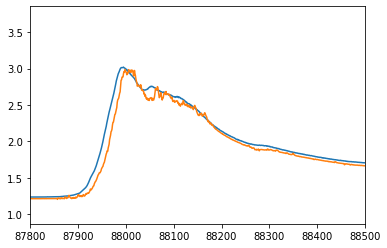

In [10]:
pyplot.plot(yTest[lookback:])
pyplot.plot(testPredict)
pyplot.xlim((87800,88500))
pyplot.show(block=False)

We do a dump of the csv file comparing the predicted river level to the actual river level

In [13]:
CsvTemp=np.concatenate([yTest[lookback:].reshape(-1,1),testPredict],axis=1)
np.savetxt('3D_Prediction_3hr_rmse.csv',CsvTemp,delimiter=',')